Train YOLOv11 for Custom Instance Segmentation

In [1]:
!nvidia-smi

Thu May  1 18:01:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Install YOLOv11

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


Instance Segmentation Example with pretrained model

In [5]:
!yolo task=detect mode=predict model=yolo11l-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100% 53.5M/53.5M [00:00<00:00, 227MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l-seg summary (fused): 491 layers, 27,646,272 parameters, 0 gradients, 142.2 GFLOPs

100% 104k/104k [00:00<00:00, 93.0MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 104.8ms
Speed: 2.5ms preprocess, 104.8ms inference, 435.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


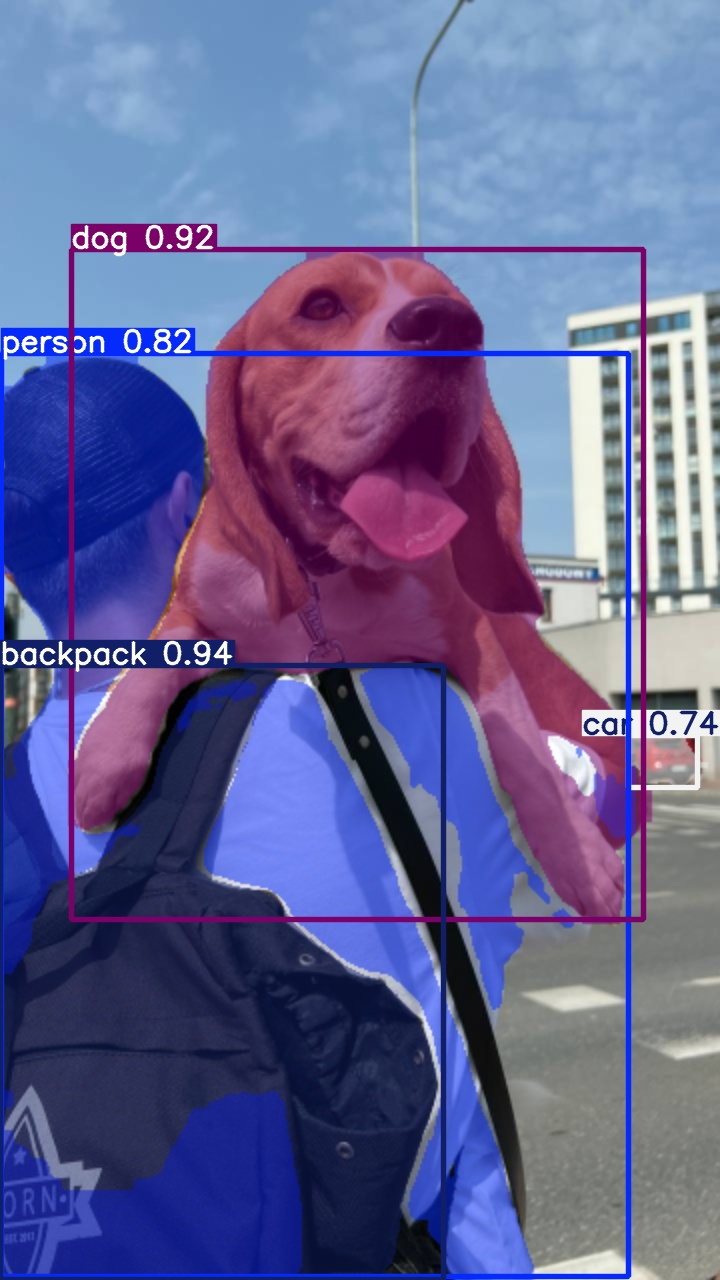

In [6]:
from IPython.display import Image as IPyImage

# Use .jpg instead of .jpeg
IPyImage(filename='runs/segment/predict/dog.jpg', width=600)

Import Dataset from Roboflow

In [7]:
!pip install roboflow


In [8]:
from roboflow import Roboflow
rf = Roboflow(api_key="EfdJ0Ke4sQqvgjkxiwhd")
project = rf.workspace("wastesenseai-e6nhn").project("wastecareai")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to WasteCareAI-2 in yolov11:: 100%|██████████| 17172/17172 [00:02<00:00, 7745.94it/s]


Train the YOLOv11 Model

In [9]:
!yolo task=segment mode=train model=yolov8l-seg.pt data=/content/WasteCareAI-2/data.yaml epochs=15 imgsz=640

100% 88.1M/88.1M [00:00<00:00, 365MB/s]
New https://pypi.org/project/ultralytics/8.3.122 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/WasteCareAI-2/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

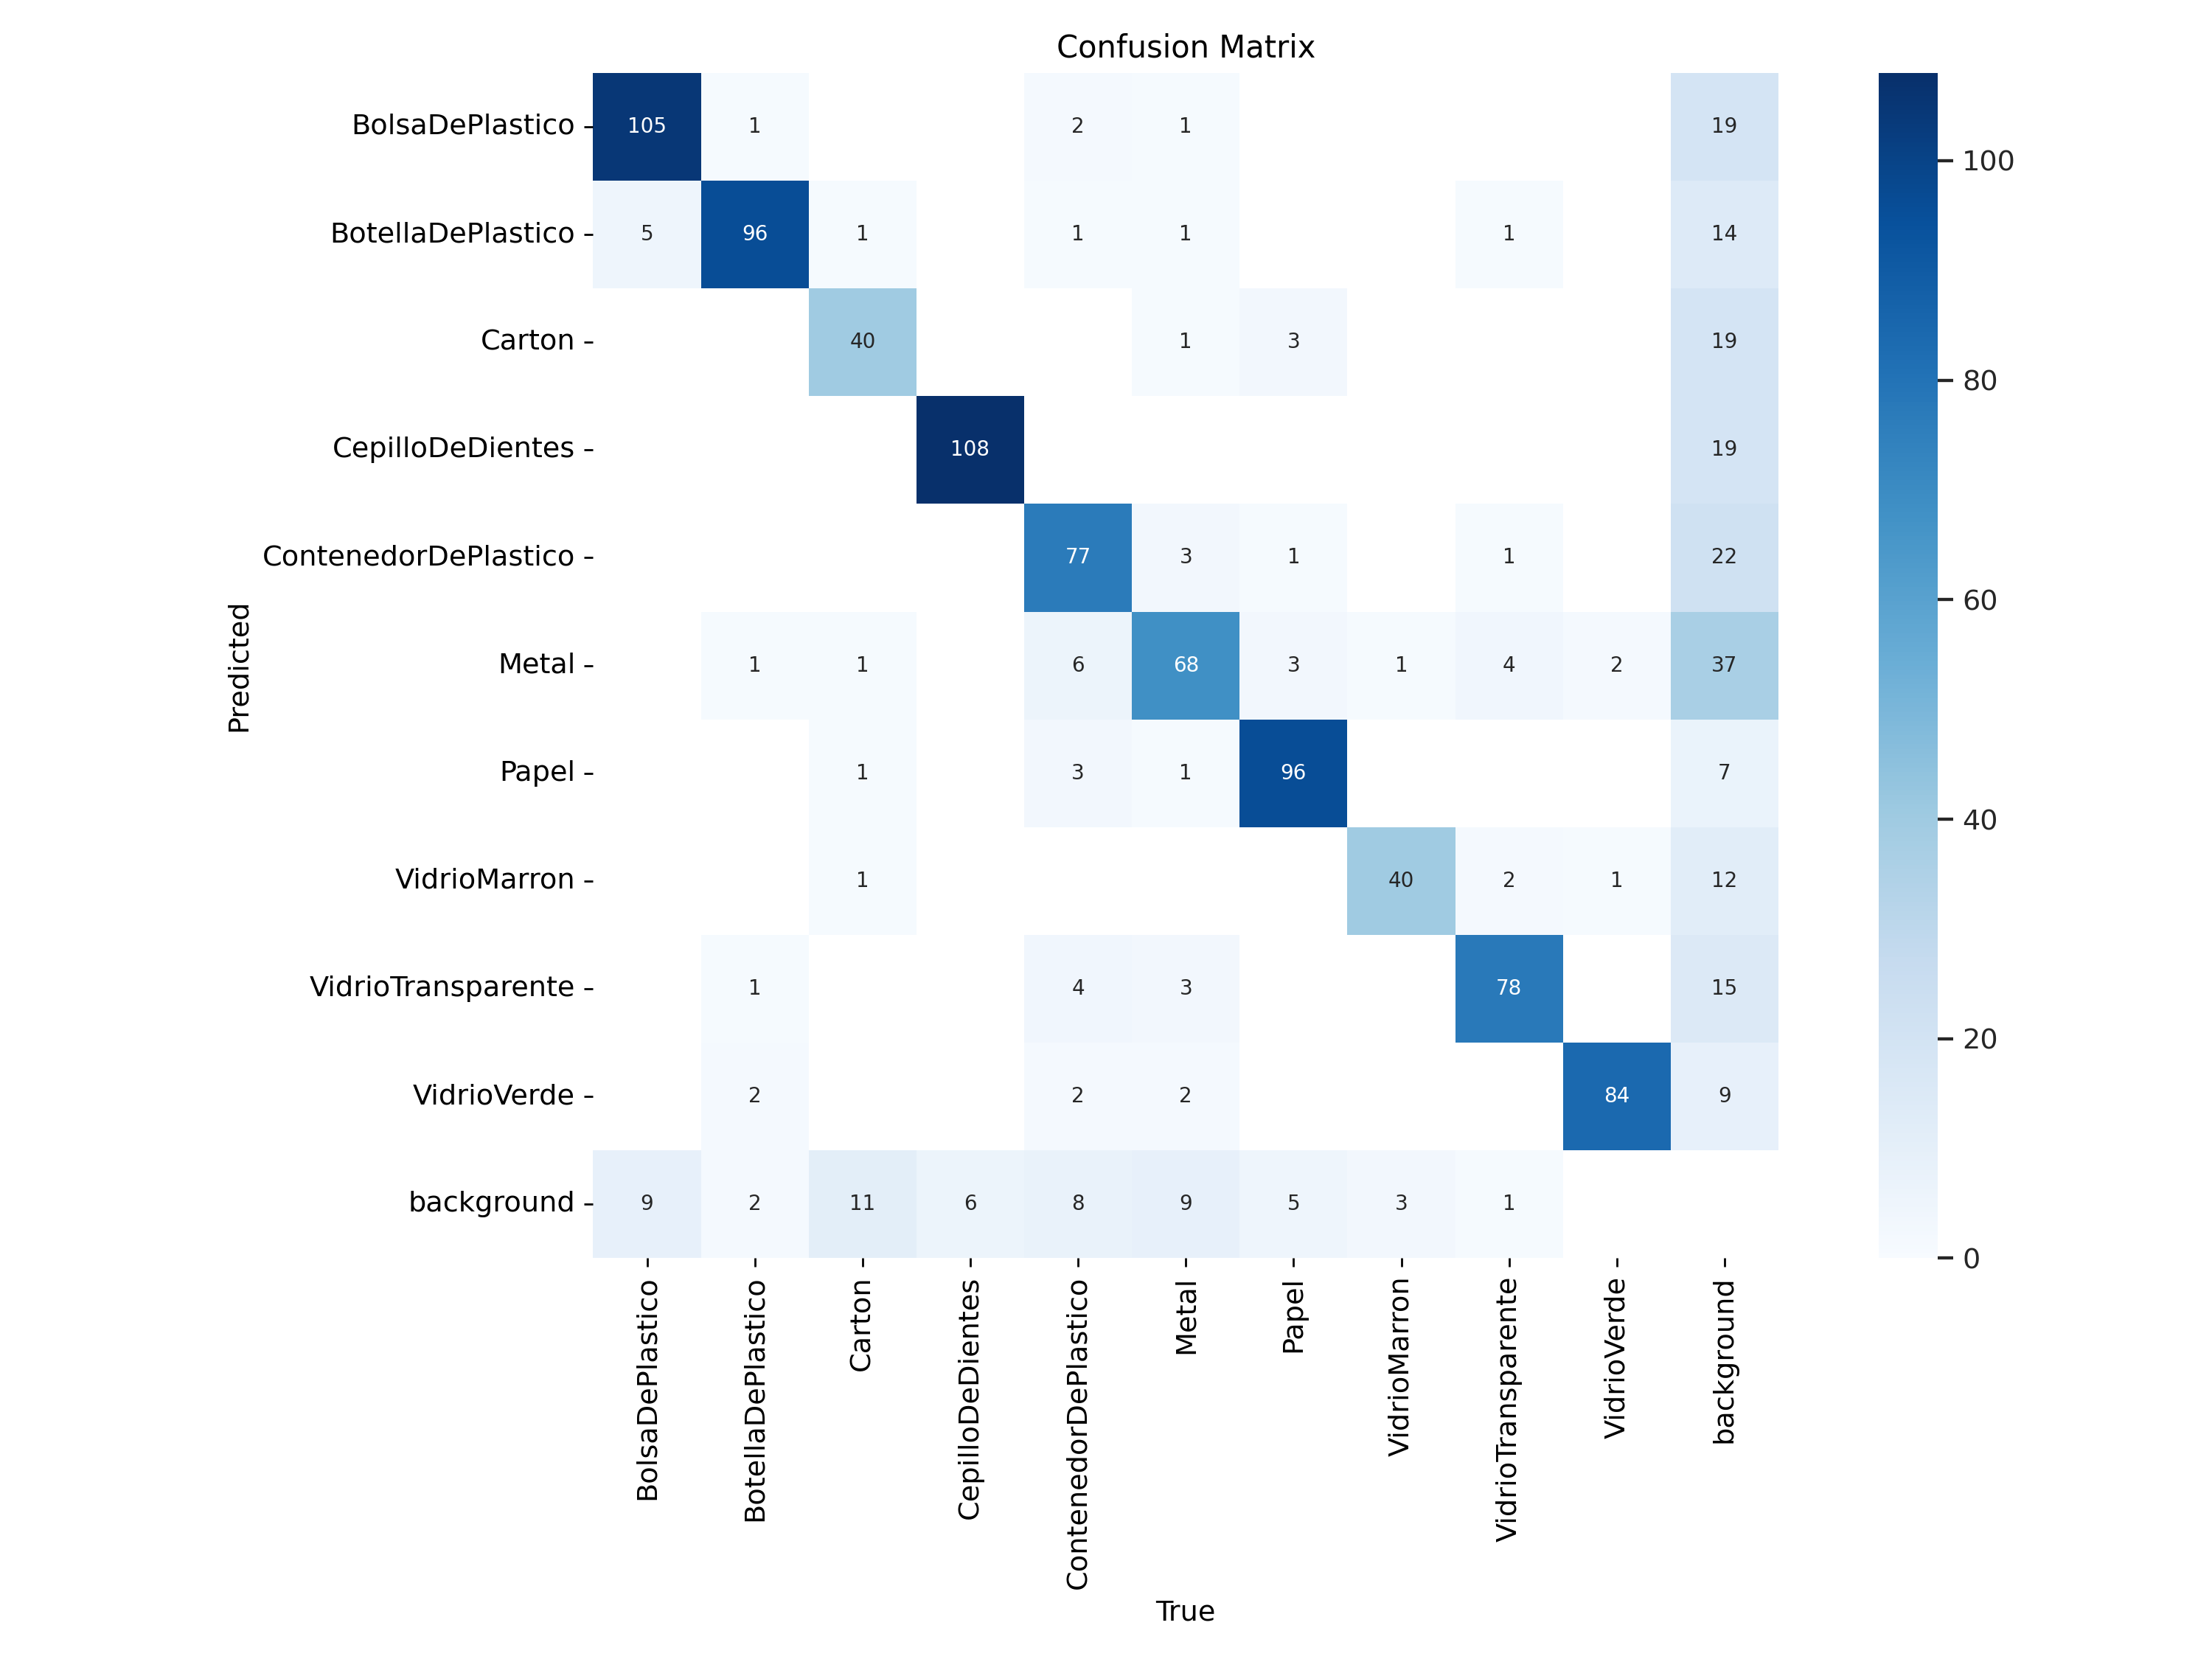

In [11]:
IPyImage(filename=f'/content/runs/segment/train/confusion_matrix.png', width=600)

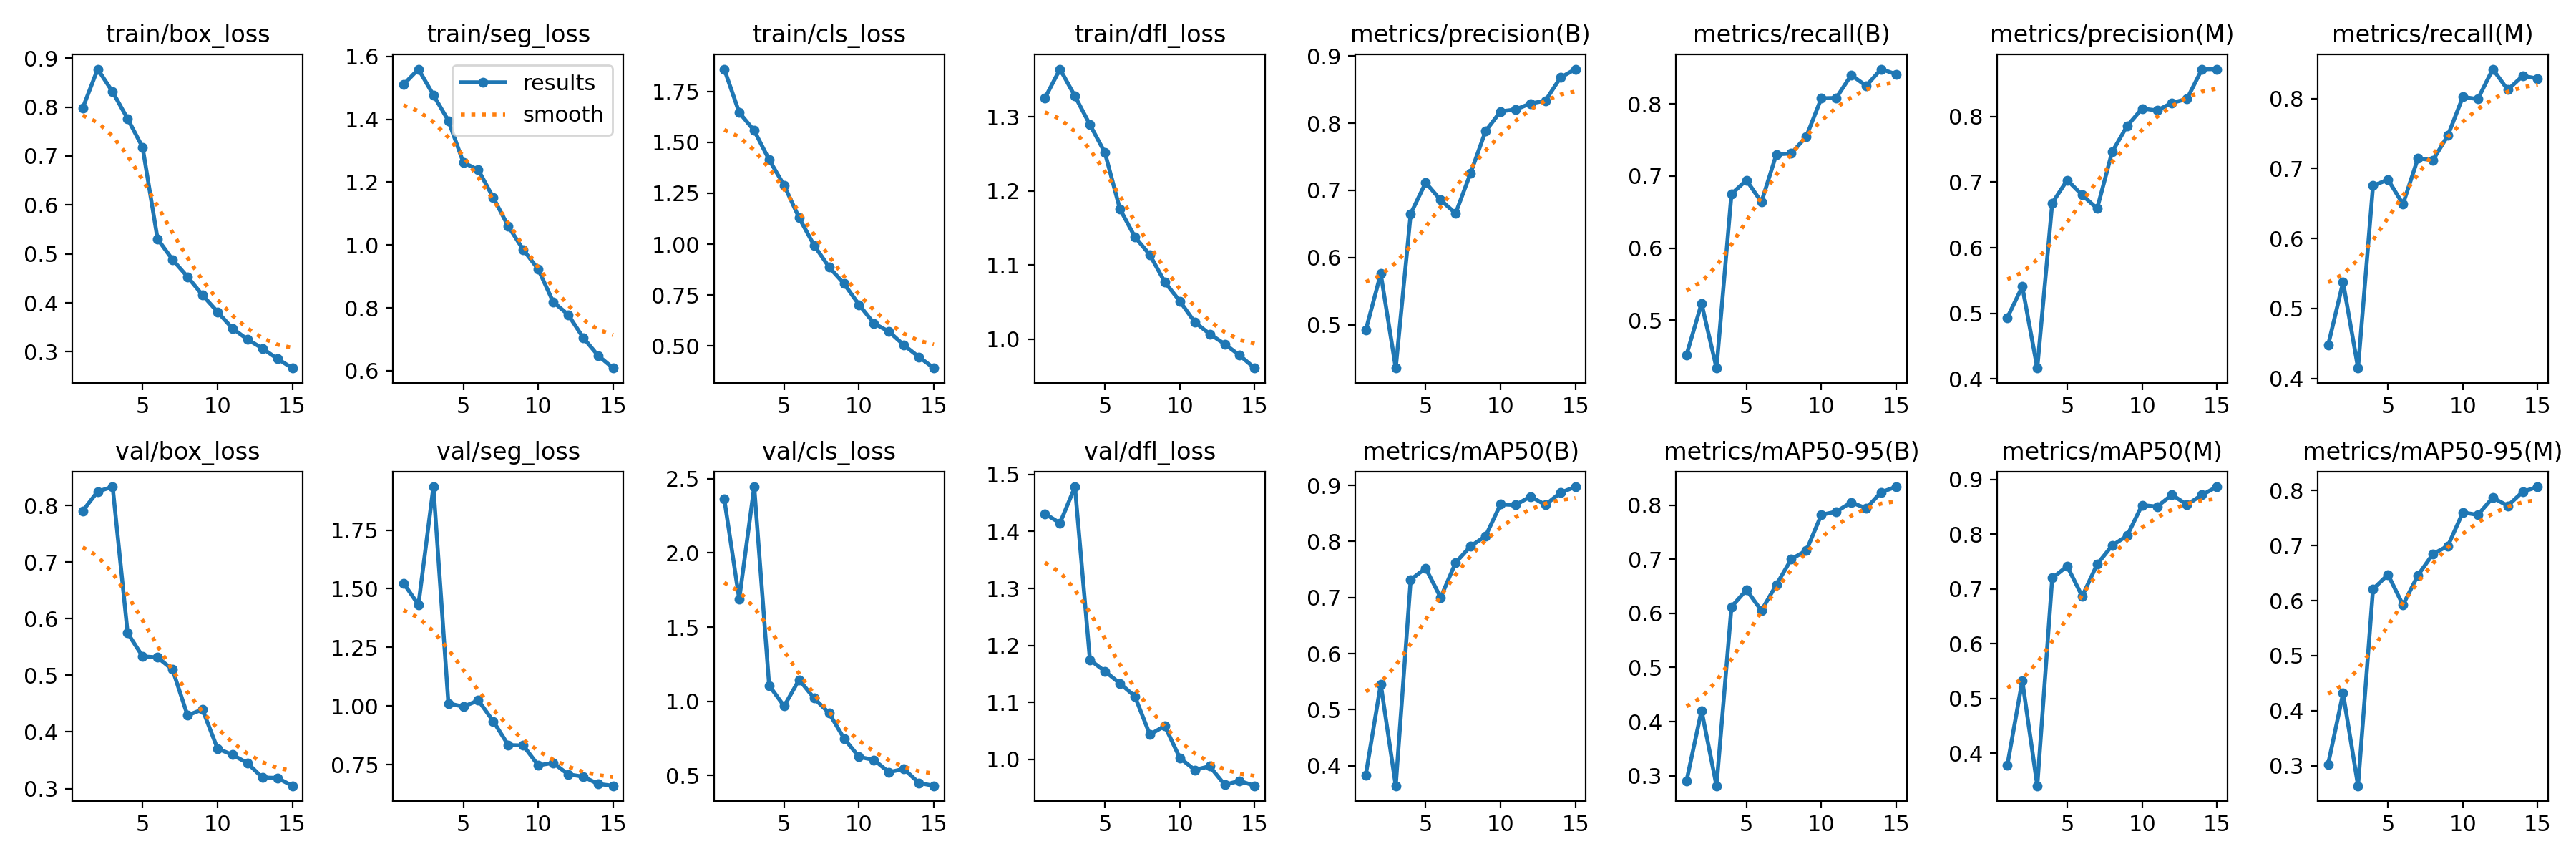

In [12]:
IPyImage(filename=f'/content/runs/segment/train/results.png', width=600)

In [13]:
!yolo task=segment mode=val model=/content/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-seg summary (fused): 295 layers, 45,919,598 parameters, 0 gradients, 220.2 GFLOPs
val: Scanning /content/WasteCareAI-2/valid/labels.cache... 628 images, 1 backgrounds, 0 corrupt: 100% 628/628 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/WasteCareAI-2/valid/images/brown-glass308_jpg.rf.20bf9c2dabbd309fb13d7a8aaf2acb86.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 40/40 [00:30<00:00,  1.32it/s]
                   all        628        909       0.88       0.84      0.898      0.834      0.872      0.828      0.887      0.807
       BolsaDePlastico         92        119      0.918      0.866      0.935      0.865      0.928      0.874      0.945      0.849
     BotellaDePlastico         81        103      0.889      0.903      0.971      0.941      0.896      0.903      0.971     

Predictions with Trained YOLOv11 Model on Custom Dataset

In [14]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt conf=0.4 source={dataset.location}/test/images


Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-seg summary (fused): 295 layers, 45,919,598 parameters, 0 gradients, 220.2 GFLOPs

image 1/398 /content/WasteCareAI-2/test/images/00000134_jpg.rf.3722da4827bbf4551e7f0374a4a68f47.jpg: 640x640 1 Metal, 76.2ms
image 2/398 /content/WasteCareAI-2/test/images/00000370_jpg.rf.067234899e4fe712da667ebe293303b9.jpg: 640x640 3 Metals, 44.3ms
image 3/398 /content/WasteCareAI-2/test/images/00000416_jpg.rf.4f797c2539f7808039f092d4dea7439a.jpg: 640x640 1 Metal, 44.2ms
image 4/398 /content/WasteCareAI-2/test/images/00000572-2_jpg.rf.ccc3a6080effbccbd6791e4f1eeaea95.jpg: 640x640 1 Metal, 45.5ms
image 5/398 /content/WasteCareAI-2/test/images/00000584_jpg.rf.625bc02e5a6a8854324c1a88db06171c.jpg: 640x640 2 Metals, 44.4ms
image 6/398 /content/WasteCareAI-2/test/images/00004544_jpg.rf.3816bee90a70bc4cde627adcaf0d2fda.jpg: 640x640 1 BolsaDePlastico, 41.8ms
image 7/398 /content/WasteCareAI-2/test/images/00004590_jpg.rf.

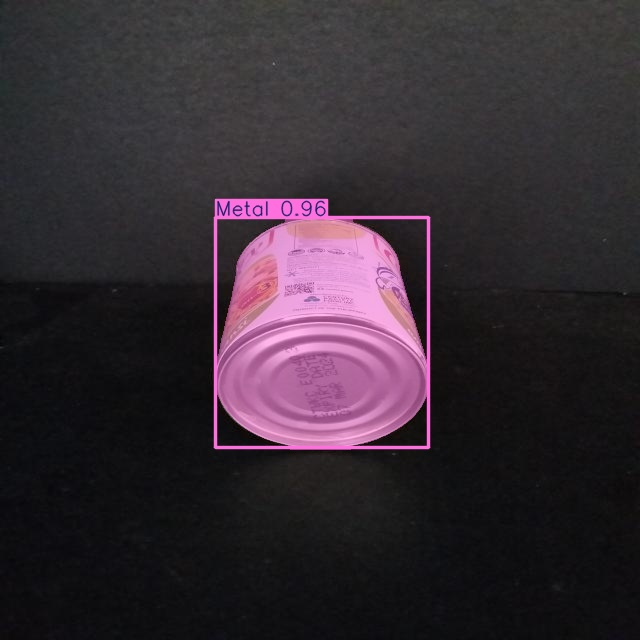

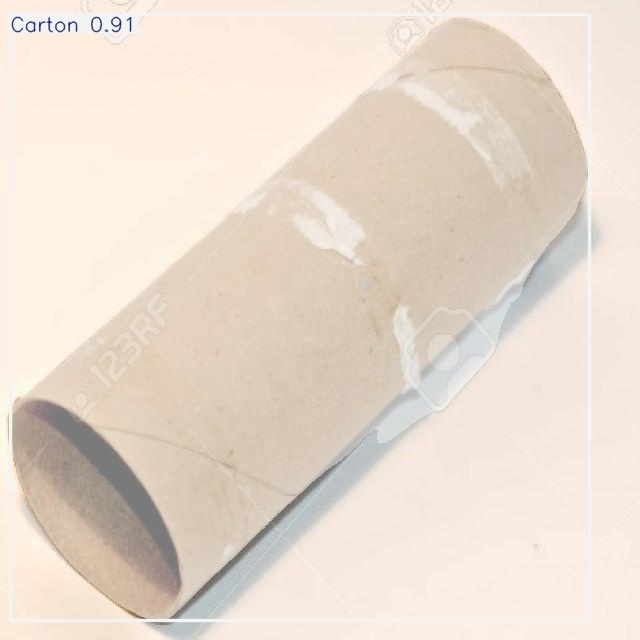

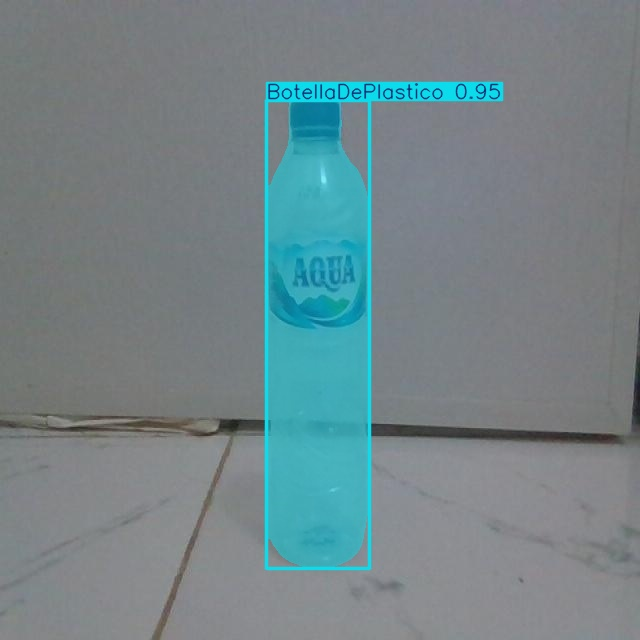

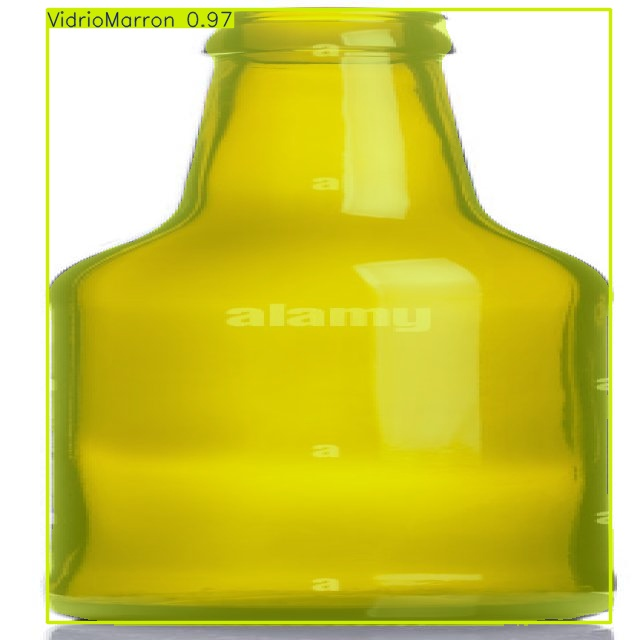

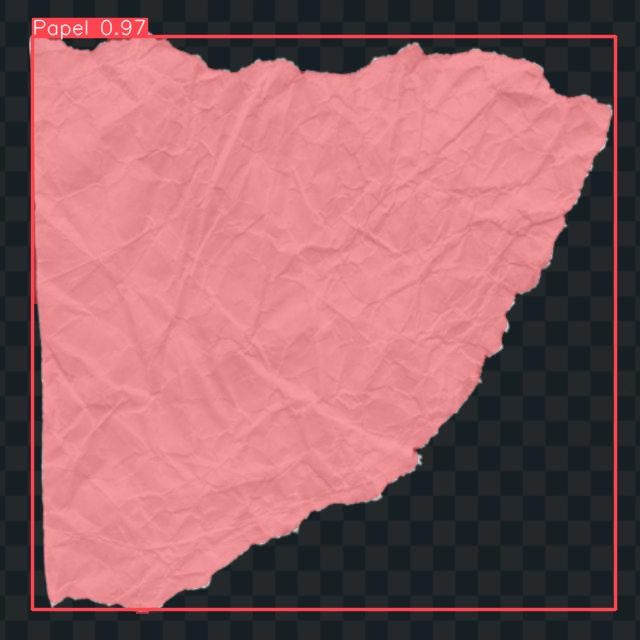

In [15]:
import glob  # (module) display
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/segment/predict2/*.jpg')[:5]:
    display(Image(filename=image_path, height=600))
    print("\n")